# 1. Preliminary Introspection of the data

#### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob
import seaborn as sns
!pip install varname
from varname import nameof


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Creating Sentiment Analysis

#### Loading DataFrames

In [3]:
!pip install twython
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


def sentiment_analysis_vader(tweet):
    score = sid.polarity_scores(tweet)["compound"]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
!pip install textblob

from textblob import TextBlob
import tweepy


def sentiment_analysis_textblob(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%pwd

'/content/drive/MyDrive'

In [6]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [8]:
!ls

'312 Broad St lease 23-24.gdoc'
'312 Broad St lease 23-24.pdf'
'Colab Notebooks'
 Company.csv
 Company_Tweet.csv
 CompanyValue.csv
'Cover Letter.pdf'
 draft-applyingUniv.gsheet
'Getting started.pdf'
'Migration Questionnaire Form - GOSPEL Immigration (1).docx'
'Migration Questionnaire Form - GOSPEL Immigration (1).gdoc'
'Migration Questionnaire Form - GOSPEL Immigration.docx'
'Migration Questionnaire Form - GOSPEL Immigration.gdoc'
'Ms. Siddhita Nikam_University List (1).xlsx'
'Ms. Siddhita Nikam_University List.xlsx'
'OOD Gas Pump.gdoc'
 sentiment_mismatch.csv
 SIDDHITA_NIKAM_ACADEMIC_TRANSCRIPT.PDF
 SIDDHITA_NIKAM_ACADEMIC_TRANSCRIPT.PDF.gdoc
'SiddhitaNikam-LOR-1-final-Jignesh (1) (1).gdoc'
'Siddhita Nikam-LOR-2-final-Vasudha (1) (1).gdoc'
 SiddhitaNikam-SOP-MS.docx
'Siddhita Nikam_University List.gsheet'
'Siddhita Nikam_University List.xlsx'
'SOP ASU (1).docx'
 SOP_Nikhil_V_2.0.docx
'SoP_v2.0 - Copy.docx'
'STATEMENT OF PURPOSE.gdoc'
 Tweet.csv
'UHA App.gdoc'
'UHA App.pdf'
'Untitled d

In [9]:
# reading the database
raw_company_db = pd.read_csv('Company.csv')
raw_company_tweet_db = pd.read_csv("Company_Tweet.csv")
raw_tweet_db = pd.read_csv("Tweet.csv")
raw_companyvalue_db = pd.read_csv("CompanyValue.csv")


# 2. Data Cleaning

#### Merging the DataFrames to form one single DataFrame

In [10]:
# Part1: Merge raw_company_tweet_db, raw_company_db
raw_company_tweet_db = pd.merge(raw_company_tweet_db, raw_company_db,on='ticker_symbol')

# Part2: Merge raw_company_tweet_db, raw_company_db
raw_tweet_db = pd.merge(raw_tweet_db, raw_company_tweet_db, on="tweet_id")

In [11]:
# Veiwing the marged Dataframe 
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple


In [12]:
# Saving the names of dataframes so we can use it if required in future
raw_tweet_db.name = nameof(raw_tweet_db)
raw_companyvalue_db.name = nameof(raw_companyvalue_db)

In [13]:
list_df = [raw_tweet_db, raw_companyvalue_db]

In [14]:
# Let us check the number of rows and columns in the dataframes
[print(f"For Dataframe {df.name}\nNumber of Rows are {df.shape[0]}\nNumber of Columns are {df.shape[1]}\n\n") for df in list_df]

For Dataframe raw_tweet_db
Number of Rows are 4336445
Number of Columns are 9


For Dataframe raw_companyvalue_db
Number of Rows are 3522
Number of Columns are 7




[None, None]

#### Missing values check: Let us check if there are any missing values

In [15]:
[print(f"For DataFrame {df.name}, we have missing values check as\n{df.isna().sum()}\n\n") for df in list_df]

For DataFrame raw_tweet_db, we have missing values check as
tweet_id             0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
company_name         0
dtype: int64


For DataFrame raw_companyvalue_db, we have missing values check as
day_date         0
open_value       0
high_value       0
low_value        0
close_value      0
volume           0
ticker_symbol    0
dtype: int64




[None, None]

In [16]:
raw_tweet_db.writer = raw_tweet_db.writer.fillna('anonymous')

In [17]:
# let us check if all null values are replaced
raw_tweet_db.isna().sum()

tweet_id         0
writer           0
post_date        0
body             0
comment_num      0
retweet_num      0
like_num         0
ticker_symbol    0
company_name     0
dtype: int64

#### let us check the data types of columns

In [18]:
[print(f"for DataFrame {df.name}\n{df.info()}\n") for df in list_df]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   writer         object
 2   post_date      int64 
 3   body           object
 4   comment_num    int64 
 5   retweet_num    int64 
 6   like_num       int64 
 7   ticker_symbol  object
 8   company_name   object
dtypes: int64(5), object(4)
memory usage: 330.8+ MB
for DataFrame raw_tweet_db
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day_date       3522 non-null   object 
 1   open_value     3522 non-null   float64
 2   high_value     3522 non-null   float64
 3   low_value      3522 non-null   float64
 4   close_value    3522 non-null   float64
 5   volume         3522 non-null   int64  
 6   ticker_symbol  3522 non-null   object 
dtyp

[None, None]

# 3. Data Engineering

### We will convert:<br>'post_date' column in raw_tweet_db & <br>'day_date' column in raw_companyvalue_db to<br>to datetime for further processing

In [19]:
raw_tweet_db.post_date = pd.to_datetime(raw_tweet_db.post_date, unit="s")
raw_companyvalue_db.day_date = pd.to_datetime(raw_companyvalue_db.day_date)

In [20]:
raw_companyvalue_db.head(2)

,day_date,open_value,high_value,low_value,close_value,volume,ticker_symbol
0,2015-01-02,27.8475,27.860001,26.837500,27.3325,212818400,AAPL
1,2015-01-05,27.0725,27.162500,26.352501,26.5625,257142000,AAPL


In [21]:
# for checking the chronologically first tweet in the dataframe, we sort the dataframe by date column
raw_tweet_db.sort_values(by="post_date", inplace=True)
raw_companyvalue_db.sort_values(by="day_date", inplace=True)

In [22]:
raw_tweet_db.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,apple
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,apple
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Amazon.com


In [23]:
raw_tweet_db.tail(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Microsoft
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,apple
4336444,1212160477159206912,treabase,2019-12-31 23:55:53,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,apple


In [24]:
raw_companyvalue_db.head(3)

,day_date,open_value,high_value,low_value,close_value,volume,ticker_symbol
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400,AAPL
1510,2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,TSLA
1511,2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,TSLA


In [25]:
raw_companyvalue_db.tail(3)

,day_date,open_value,high_value,low_value,close_value,volume,ticker_symbol
1508,2020-12-29,138.050003,138.789993,134.339996,134.869995,121047300,AAPL
3019,2020-12-30,672.000000,696.599976,668.359985,694.780029,42846000,TSLA
1509,2020-12-30,135.580002,135.990005,133.399994,133.720001,96452100,AAPL


## Viweing the dates at the head and tail end of the dataframe, we see that:
#### a. starting date to considered as 1 Jan 2019
#### b. last tweet in raw_tweet_db dataframe was tweeted on 31 Dec 2019 
#### c. but the stock values are given till 29 May 2020.

#### So we will drop the values for the year 2020.

In [26]:
raw_companyvalue_db = raw_companyvalue_db[raw_companyvalue_db.day_date < "2020-01-01"]

In [27]:
raw_companyvalue_db = raw_companyvalue_db[raw_companyvalue_db.day_date > "2019-01-01"]

In [28]:
raw_companyvalue_db.tail()

,day_date,open_value,high_value,low_value,close_value,volume,ticker_symbol
3521,2019-12-30,158.990005,159.020004,156.729996,157.589996,16348400,MSFT
1256,2019-12-30,72.364998,73.172501,71.305000,72.879997,144114400,AAPL
2766,2019-12-30,85.758003,85.800003,81.851997,82.940002,62932000,TSLA
1257,2019-12-31,72.482498,73.419998,72.379997,73.412498,100805600,AAPL
2767,2019-12-31,81.000000,84.258003,80.416000,83.666000,51428500,TSLA


### We will add additional columns to raw_companyvalue_db which we will need in future for checking the stock value performance

In [29]:
# Let us add column to the stock price dataframe which shows the max stock price fluctuation
raw_companyvalue_db['fluctuation'] = raw_companyvalue_db.high_value - raw_companyvalue_db.low_value

# Let us add column to the stock price dataframe which shows the net rise in stock price
raw_companyvalue_db['price_gain'] = raw_companyvalue_db.close_value - raw_companyvalue_db.open_value

# Let us add column to the stock price dataframe which shows the total valuation at the end of the day
raw_companyvalue_db['total_valuation_EOD'] = raw_companyvalue_db.volume * raw_companyvalue_db.close_value

In [30]:
raw_companyvalue_db.head(3)

,day_date,open_value,high_value,low_value,close_value,volume,ticker_symbol,fluctuation,price_gain,total_valuation_EOD
3020,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,7983100,AMZN,92.429931,73.930054,1.228703e+10
2516,2019-01-02,61.220001,63.026001,59.759998,62.023998,58293000,TSLA,3.266003,0.803997,3.615565e+09
1006,2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800,AAPL,1.155003,0.757500,5.849309e+09


In [31]:
raw_tweet_db.count()


tweet_id         4336445
writer           4336445
post_date        4336445
body             4336445
comment_num      4336445
retweet_num      4336445
like_num         4336445
ticker_symbol    4336445
company_name     4336445
dtype: int64

In [32]:
raw_tweet_db = raw_tweet_db[(raw_tweet_db['post_date'].dt.year == 2019)]

In [33]:
raw_tweet_db.head(3)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,Tesla Inc
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,GOOGL,Google Inc
3431136,1079890627335213057,traderDanielle,2019-01-01 00:02:43,Rinse and repeat - looking for entries in $XLC...,0,0,3,GOOGL,Google Inc


### Applying sentiment analysis to the tweets using vadern and textblob to check which would be a better fit:

In [34]:
raw_tweet_db['sentiment_vader'] = raw_tweet_db['body'].apply(lambda x : sentiment_analysis_vader(x))

<ipython-input-34-a0b0130530de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tweet_db['sentiment_vader'] = raw_tweet_db['body'].apply(lambda x : sentiment_analysis_vader(x))


In [35]:
raw_tweet_db['sentiment_textblob'] = raw_tweet_db['body'].apply(lambda x : sentiment_analysis_textblob(x))

<ipython-input-35-39bb1adb06e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tweet_db['sentiment_textblob'] = raw_tweet_db['body'].apply(lambda x : sentiment_analysis_textblob(x))


In [36]:
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,sentiment_vader,sentiment_textblob
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,Tesla Inc,negative,negative
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,GOOGL,Google Inc,positive,positive


In [37]:

mask = raw_tweet_db['sentiment_vader'] != raw_tweet_db['sentiment_textblob']

filtered_df = raw_tweet_db[mask]

In [38]:
print(filtered_df.shape)

(346016, 11)


In [60]:
filtered_df.to_csv('sentiment_mismatch.csv', index=False)


###Sentiment analysis comparision

####Analysing which was giving more accurate setiment analysis by comparing the tweets which had different sentiment analysis from both these 2 analysis

####Decided to go with vader as we found it to be more accurate in the analysis performed.

In [39]:

sid = SentimentIntensityAnalyzer()


def sentiment_analysis(tweet):
    score = sid.polarity_scores(tweet)["compound"]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"



####Dropping the sentiment_textblob column and renaming the sentiment_vader column to sentiment

In [40]:
raw_tweet_db.drop('sentiment_textblob', axis=1, inplace=True)
raw_tweet_db.rename(columns={'sentiment_vader': 'sentiment'}, inplace=True)
raw_tweet_db.head(2)

<ipython-input-40-c77adaa9c26b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tweet_db.drop('sentiment_textblob', axis=1, inplace=True)
<ipython-input-40-c77adaa9c26b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tweet_db.rename(columns={'sentiment_vader': 'sentiment'}, inplace=True)


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company_name,sentiment
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,Tesla Inc,negative
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,GOOGL,Google Inc,positive


### Adding a column specifying the trending score of every tweet considering the retweet count, likes and comments for that tweet

In [41]:
# Considering there is a 'comment,  retweet & like' column, we can consider those tweets having the same sentiments
# So for counting the total number of tweets, we add a count column telling the trending score of the tweet which will be addition of all these 3 columns
# Adding 1 to trend score as tweet itself is one of the contributors to itself

raw_tweet_db.insert(7, "trend_score", raw_tweet_db.comment_num + raw_tweet_db.retweet_num + raw_tweet_db.like_num + 1)

In [42]:
raw_tweet_db.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,trend_score,ticker_symbol,company_name,sentiment
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,105,TSLA,Tesla Inc,negative
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,1,GOOGL,Google Inc,positive


### Let us work on merging the 2 dataframes. For that, we need an anchor column to merge on

In [43]:
print("Number of rows in dataframe:", raw_tweet_db.shape[0])


Number of rows in dataframe: 905311


In [45]:
# Creating Anchor Column for raw_tweet_db
raw_tweet_db.insert(3, "date_str", raw_tweet_db.post_date.astype("str").str.split(" "))
raw_tweet_db.date_str = [element[0] for element in raw_tweet_db.date_str]
raw_tweet_db.insert(0, "anchor", raw_tweet_db.date_str + raw_tweet_db.ticker_symbol)

# Creating Anchor Column for raw_companyvalue_db
raw_companyvalue_db.insert(
    2, "date_str", raw_companyvalue_db.day_date.astype("str").str.split(" ")
)
raw_companyvalue_db.date_str = [element[0] for element in raw_companyvalue_db.date_str]
raw_companyvalue_db.insert(
    0, "anchor", raw_companyvalue_db.date_str + raw_companyvalue_db.ticker_symbol
)

<ipython-input-45-074f16070c53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tweet_db.date_str = [element[0] for element in raw_tweet_db.date_str]


In [46]:
# Merging the two dataframe
processed_db = pd.merge(raw_tweet_db, raw_companyvalue_db, on="anchor")

In [47]:
# Let us convert he string date column "date_str_x" to datetime
processed_db.date_str_x = pd.to_datetime(processed_db.date_str_x)

In [48]:
# Since we are aiming to see the impact of tweets on stock value (i.e. rise and fall), we can drop "neutral" sentiments
processed_db = processed_db[processed_db.sentiment != "neutral"]

## Making a clean database

In [49]:
# Let us make a clean dataset with only the desired values
clean_db = processed_db[
    [
        "post_date",
        "date_str_x",
        "body",
        "trend_score",
        "ticker_symbol_x",
        "company_name",
        "sentiment",
        "close_value",
        "volume",
        "open_value",
        "high_value",
        "low_value",
        "fluctuation",
        "price_gain",
        "total_valuation_EOD"
    ]
]

In [50]:
# Let us check how many companies do we have in our dataset

print(
    f"In our dataset, we have total {len(clean_db.company_name.value_counts())} companies, namely\n{clean_db.company_name.value_counts()}"
)

In our dataset, we have total 4 companies, namely
Tesla Inc     219087
apple         117580
Amazon.com     80301
Microsoft      31128
Name: company_name, dtype: int64


In [51]:
# Let us check by ticker symbol
clean_db.ticker_symbol_x.value_counts()

TSLA    219087
AAPL    117580
AMZN     80301
MSFT     31128
Name: ticker_symbol_x, dtype: int64

In [52]:
# Let us make datasets for these 5 companies
apple_df = clean_db[clean_db.ticker_symbol_x == "AAPL"]
tesla_df = clean_db[clean_db.ticker_symbol_x == "TSLA"]
amazon_df = clean_db[clean_db.ticker_symbol_x == "AMZN"]
microsoft_df = clean_db[clean_db.ticker_symbol_x == "MSFT"]

In [53]:
# For simplicity, we will further form 2 sub dataframes per company based on the sentiments: positive and negative

pos_apple_df = apple_df[apple_df.sentiment == "positive"]
pos_tesla_df = tesla_df[tesla_df.sentiment == "positive"]
pos_amazon_df = amazon_df[amazon_df.sentiment == "positive"]
pos_microsoft_df = microsoft_df[microsoft_df.sentiment == "positive"]
neg_apple_df = apple_df[apple_df.sentiment == "negative"]
neg_tesla_df = tesla_df[tesla_df.sentiment == "negative"]
neg_amazon_df = amazon_df[amazon_df.sentiment == "negative"]
neg_microsoft_df = microsoft_df[microsoft_df.sentiment == "negative"]

In [54]:
# Let us create dataset with limited values that give us a brief info about rise and fall in total valuation of the company over time

ovr_pos_apple_df = pos_apple_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_tesla_df = pos_tesla_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_amazon_df = pos_amazon_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_pos_microsoft_df = pos_microsoft_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})


ovr_neg_apple_df = neg_apple_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_tesla_df = neg_tesla_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_amazon_df = neg_amazon_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})
ovr_neg_microsoft_df = neg_microsoft_df.groupby(by=["date_str_x","fluctuation", "price_gain", "total_valuation_EOD","sentiment"], as_index=False).agg({"trend_score":pd.Series.sum})

# 4. Data Analysis

## Tesla

### Let us analyse for Tesla
### We will analyse effect of Positive Tweets on Valuation

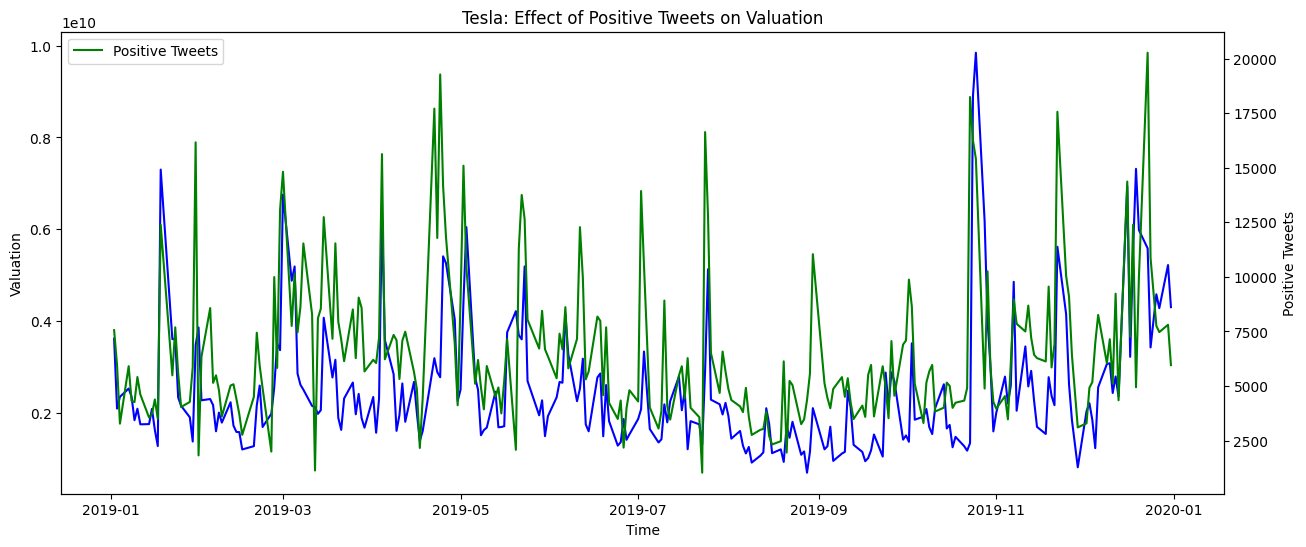

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Positive Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_tesla_df.date_str_x,
    ovr_pos_tesla_df.total_valuation_EOD,
    color="b",
    label="Valuation",
)
ax2.plot(
    ovr_pos_tesla_df.date_str_x,
    ovr_pos_tesla_df.trend_score,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

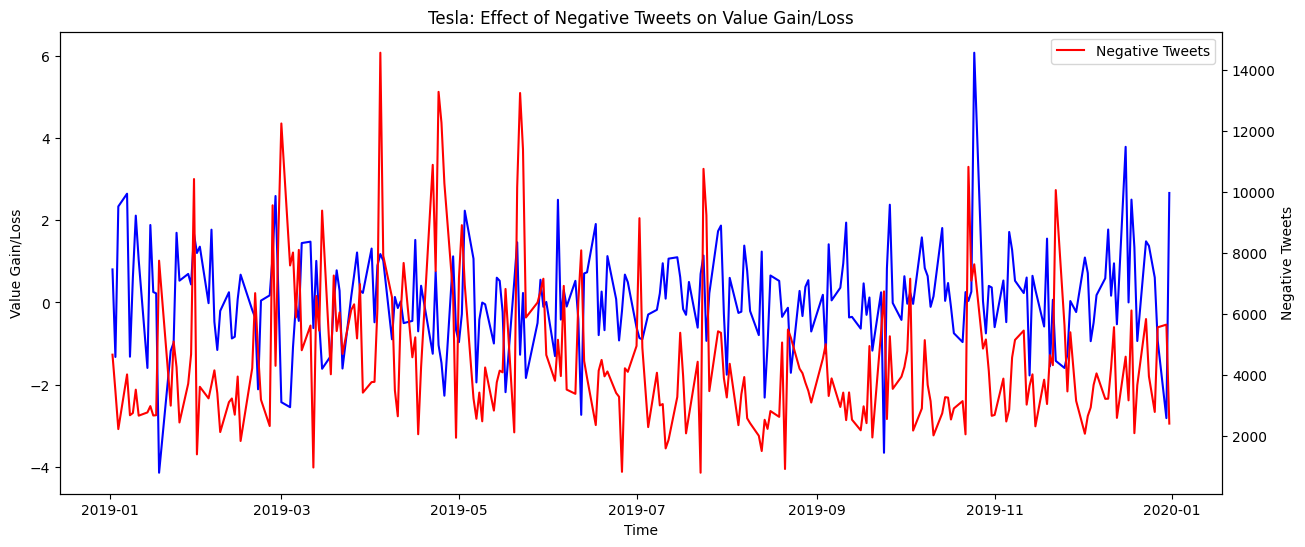

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.price_gain,
    color="b",
    label="Value",
)
ax2.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### We see that it becomes difficult to understand the effect of negative tweets on stock price. Hence, let us plot by taking the log values of "price_gain"

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


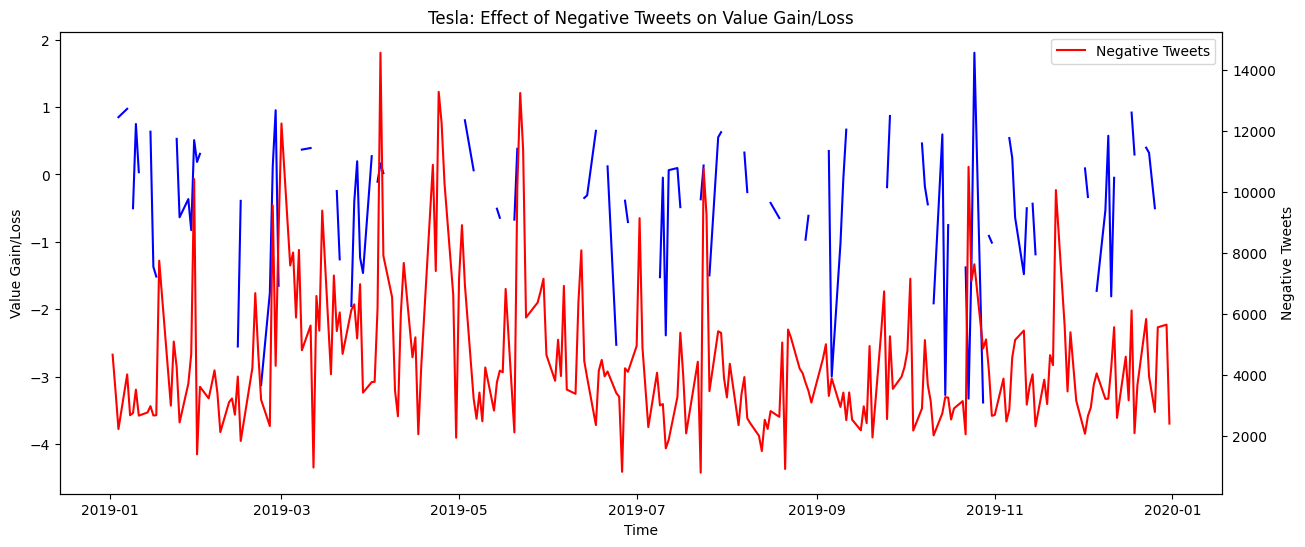

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_tesla_df.date_str_x,
    np.log(ovr_neg_tesla_df.price_gain),
    color="b",
    label="Value",
)
ax2.plot(
    ovr_neg_tesla_df.date_str_x,
    ovr_neg_tesla_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

#### Taking logs seems to provide better viewing of the graph. Hence, we will take log values of 'price_gain' column while plotting

### From the above graph we see that where there is a spike in Negative Tweets, 
### the price gain is negative i.e. there is drop in valuation

### We can conclude that Tesla's valuation is affected by Tweets

## Apple

### Let us analyse for Apple

### We will analyse effect of Positive Tweets on Valuation

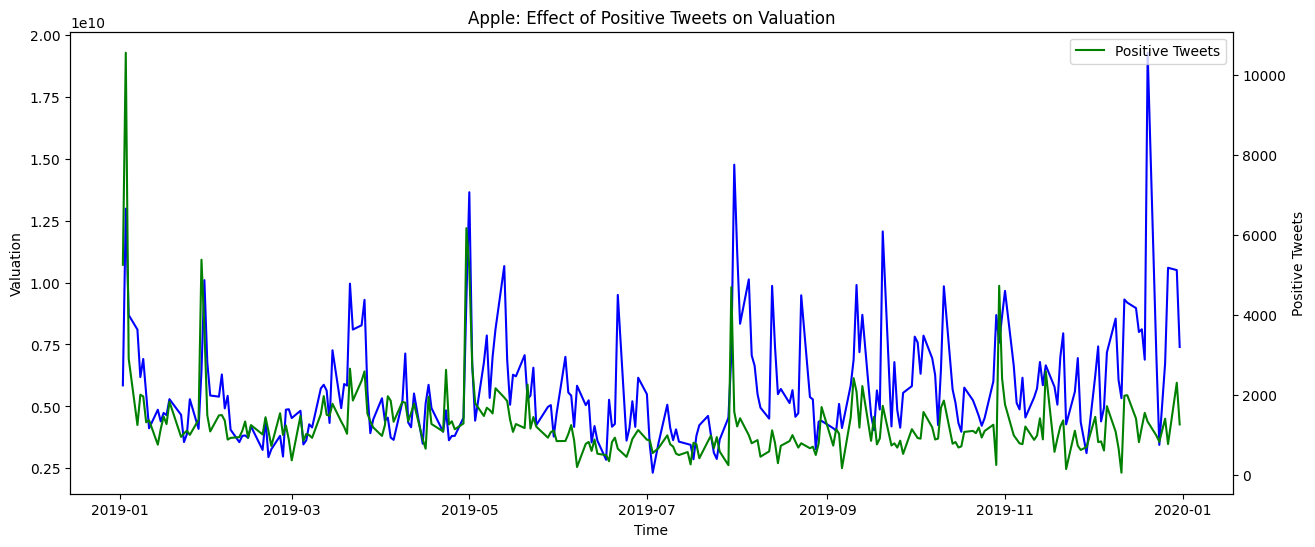

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Positive Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_apple_df.date_str_x,
    ovr_pos_apple_df.total_valuation_EOD,
    color="b",
    label="Valuation",
)
ax2.plot(
    ovr_pos_apple_df.date_str_x,
    ovr_pos_apple_df.trend_score,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

### We notice that where there is a spike in Positive Tweets, there is spike in the valuation

### Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

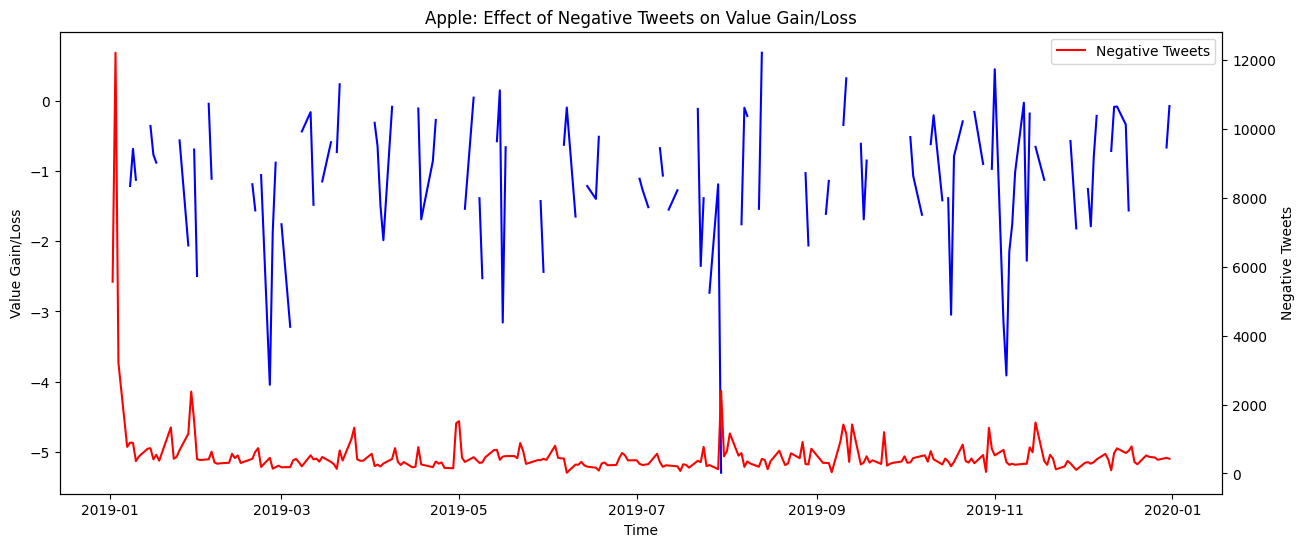

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_apple_df.date_str_x,
    np.log(ovr_neg_apple_df.price_gain),
    color="b",
    label="Value",
)
ax2.plot(
    ovr_neg_apple_df.date_str_x,
    ovr_neg_apple_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Value Gain/Loss")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

### From the above graph we see that there is no proper correlation between negative tweets and drop in Apple share value
### We can conclude that Apple's valuation is affected only by Positive Tweets

Amazon


Let us analyse for Amazon

We will analyse effect of Positive Tweets on Valuation

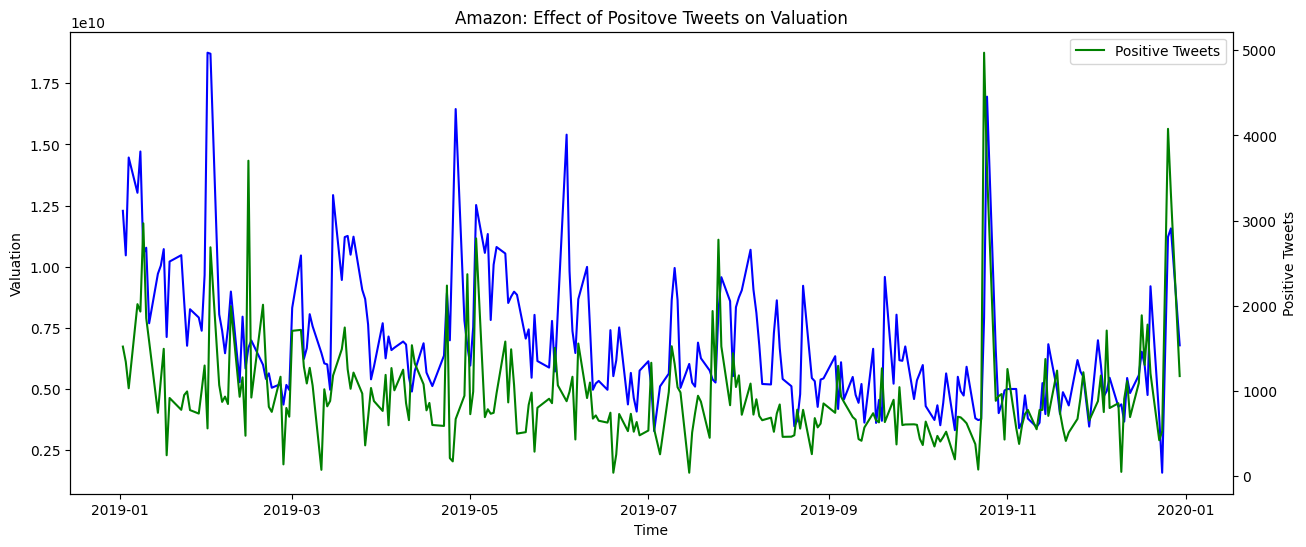

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Amazon: Effect of Positove Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_amazon_df.date_str_x,
    ovr_pos_amazon_df.total_valuation_EOD,
    color="b",
    label="Valuation",
)
ax2.plot(
    ovr_pos_amazon_df.date_str_x,
    ovr_pos_amazon_df.trend_score,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

We notice that where there is a spike in Positive Tweets, there is spike in the valuation

Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

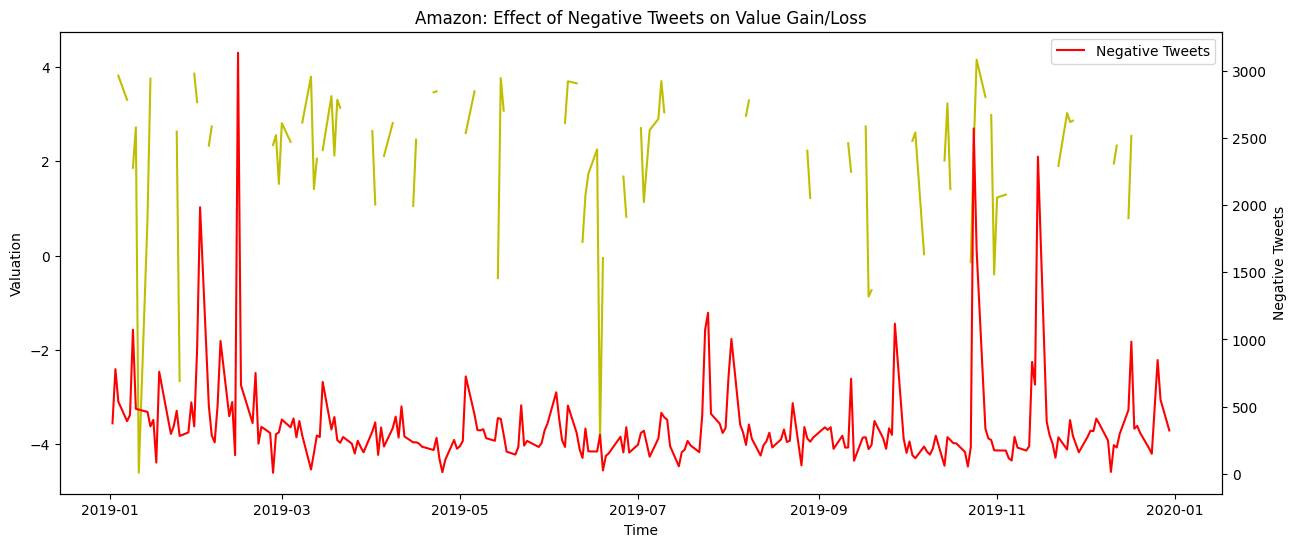

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Amazon: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_amazon_df.date_str_x,
    np.log(ovr_neg_amazon_df.price_gain),
    color="y",
    label="Value",
)
ax2.plot(
    ovr_neg_amazon_df.date_str_x,
    ovr_neg_amazon_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

From the above graph we see that where there is a spike in Negative Tweets,

the price gain is negative i.e. there is drop in valuation

We can conclude that Amazon's valuation is affected by Tweets

Microsoft

Let us analyse for Microsoft

We will analyse effect of Positive Tweets on Valuation

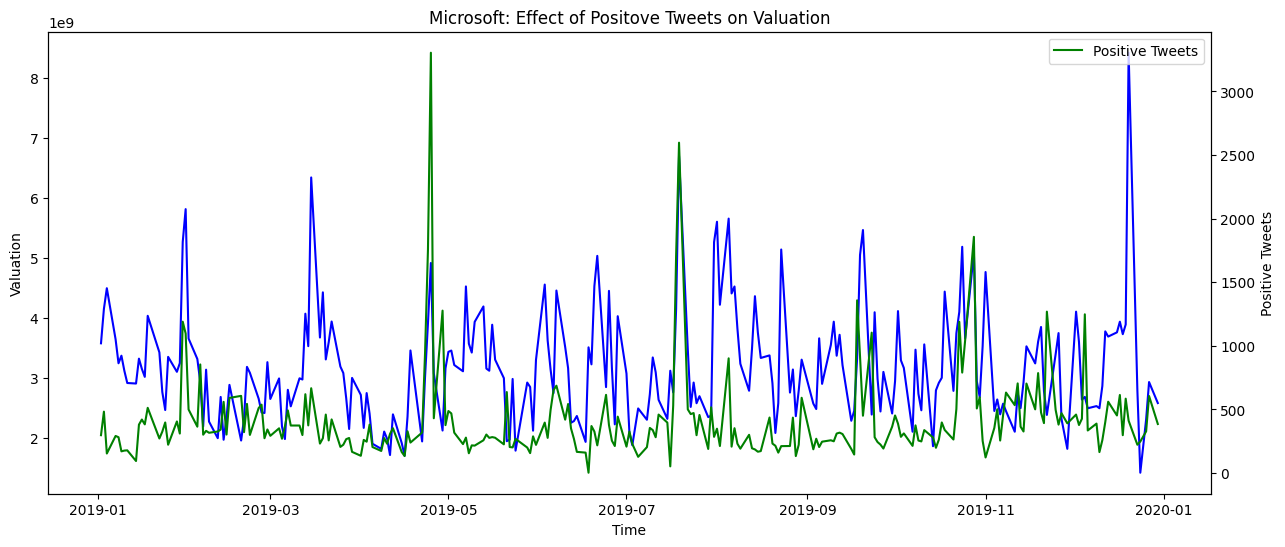

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Microsoft: Effect of Positove Tweets on Valuation")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_pos_microsoft_df.date_str_x,
    ovr_pos_microsoft_df.total_valuation_EOD,
    color="b",
    label="Valuation",
)
ax2.plot(
    ovr_pos_microsoft_df.date_str_x,
    ovr_pos_microsoft_df.trend_score,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

We notice that where there is a spike in Positive Tweets, there is spike in the valuation

Let us plot line graph to analyse effect of Negative Tweets & its effect on net gain/loss in valuation

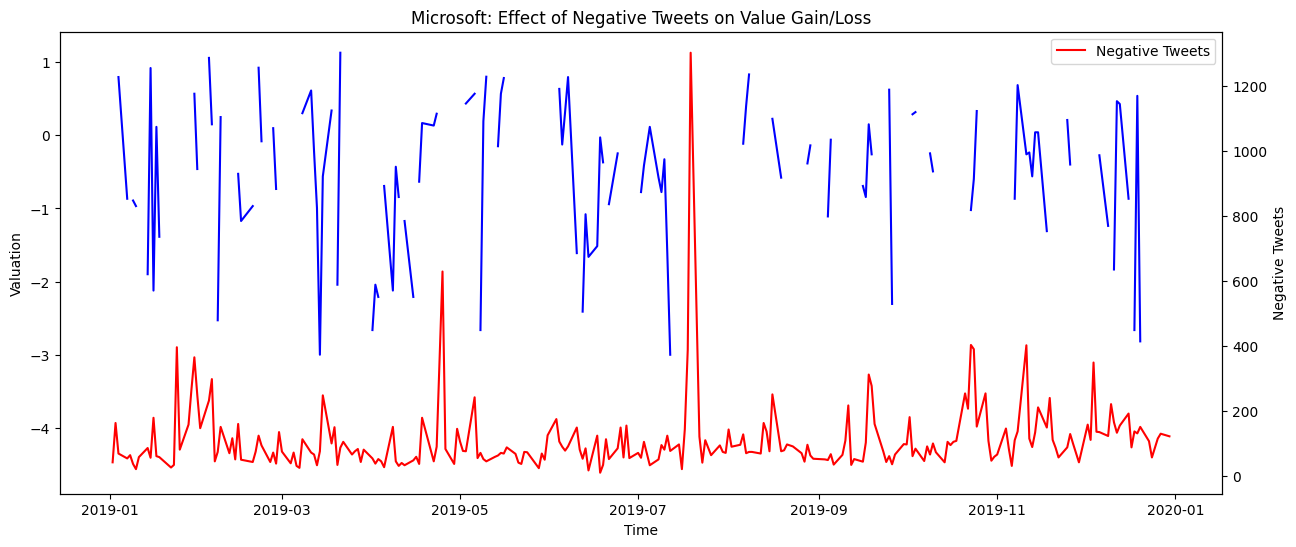

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Microsoft: Effect of Negative Tweets on Value Gain/Loss")
# since we are plotting 2 line graphs with same X-axis
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    ovr_neg_microsoft_df.date_str_x,
    np.log(ovr_neg_microsoft_df.price_gain),
    color="b",
    label="Value",
)
ax2.plot(
    ovr_neg_microsoft_df.date_str_x,
    ovr_neg_microsoft_df.trend_score,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

From the above graph we see that generally where there is a spike in Negative Tweets,

the price gain is negative i.e. there is drop in valuation

We can conclude that Microsoft's valuation is affected by Tweets

**Conclusion**

From analysing the given data, we conclude that:

1)Positive Tweet Spikes (high trending) coincide with rise in stock value

2)Negative Tweet Spikes (high trending) overall coincide with drop in stock value, however it is not as obvious as Positive Tweets

3)(Naturally) there are also other factors contributing to rise/fall of stock values as we see no relation to rise/fall of stock value with low-medium trending tweets